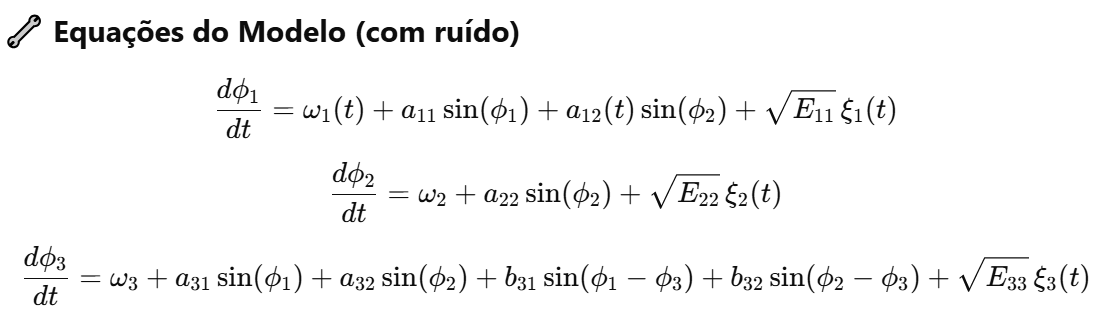

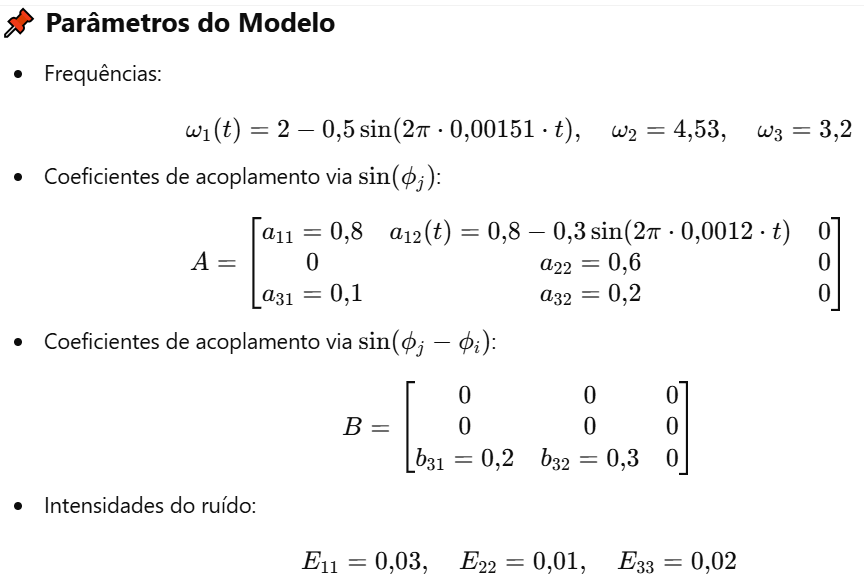

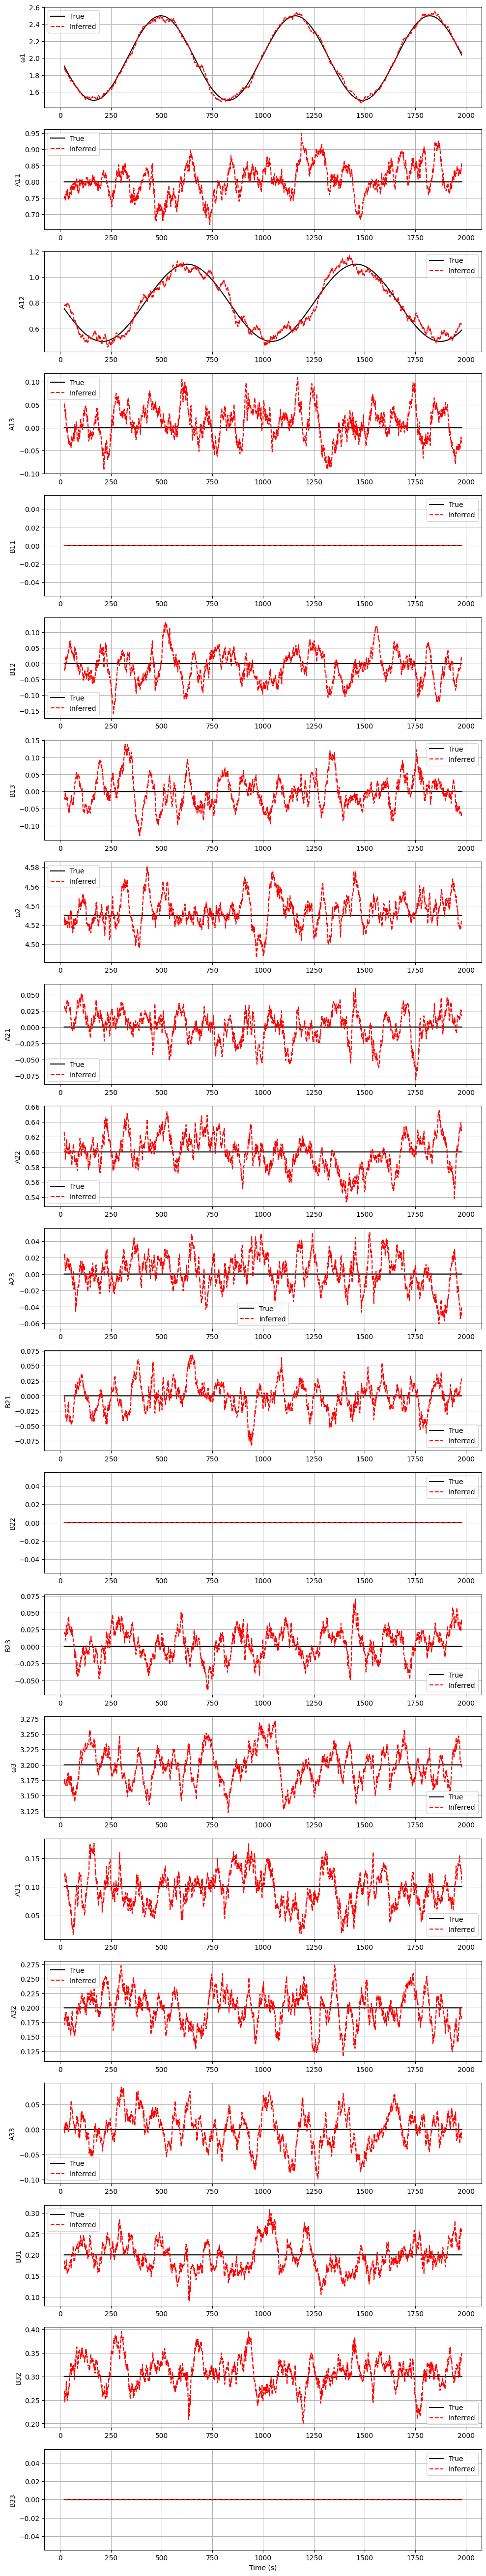

   Oscillator Parameter  True Value  Inferred
0           1        ω1      2.0368    2.0564
1           1       A11      0.8000    0.8571
2           1       A12      0.5876    0.6284
3           1       A13      0.0000   -0.0281
4           1       B11      0.0000    0.0000
5           1       B12      0.0000    0.0134
6           1       B13      0.0000   -0.0672
7           2        ω2      4.5300    4.5248
8           2       A21      0.0000    0.0169
9           2       A22      0.6000    0.6278
10          2       A23      0.0000   -0.0405
11          2       B21      0.0000    0.0249
12          2       B22      0.0000    0.0000
13          2       B23      0.0000    0.0313
14          3        ω3      3.2000    3.1958
15          3       A31      0.1000    0.1073
16          3       A32      0.2000    0.1867
17          3       A33      0.0000   -0.0183
18          3       B31      0.2000    0.2601
19          3       B32      0.3000    0.3460
20          3       B33      0.000

In [2]:
import numpy as np
import dynabayes as db

# === Modelo 3 Osciladores (com 2 primeiras equações idênticas ao modelo de 2 osciladores) ===
omega_model2 = [
    lambda t: 2 - 0.5 * np.sin(2 * np.pi * 0.00151 * t),  # ω1(t)
    db.const(4.53),                                       # ω2
    db.const(3.2)                                         # ω3 (livre)
]

A_model2 = [
    [db.const(0.8), lambda t: 0.8 - 0.3 * np.sin(2 * np.pi * 0.0012 * t), db.const(0.0)],  # φ1
    [db.const(0.0), db.const(0.6), db.const(0.0)],                                         # φ2
    [db.const(0.1), db.const(0.2), db.const(0.0)]                                          # φ3
]

B_model2 = [
    [db.const(0.0), db.const(0.0), db.const(0.0)],  # φ1
    [db.const(0.0), db.const(0.0), db.const(0.0)],  # φ2
    [db.const(0.2), db.const(0.3), db.const(0.0)]   # φ3
]

# Parâmetros da simulação
E_vals = [0.03, 0.01, 0.02]
t_max = 2000
dt = 0.01
t = np.arange(0, t_max, dt)

# Simular dados
phi, true_funcs, t = db.simulate_model(omega_model2, A_model2, B_model2, E=E_vals, t_max=t_max, dt=dt)

# Inferência
params, centers = db.run_inference(phi, dt=dt, E_true=E_vals, pw=0.2, t=t)

# Visualização
db.plot_parameters(params, true_funcs, centers)
db.show_summary(params, true_funcs, centers)
